In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-inviter-conv)

We set up a $5\times 5$ triangular matrix with prescribed eigenvalues on its diagonal.

In [2]:
ev = [1, -0.75, 0.6, -0.4, 0];
A = triu(ones(5, 5), 1) + diag(ev);

We run inverse iteration with the shift $s=0.7$. The result should converge to the eigenvalue closest to 0.7, which we know to be 0.6 here.

In [3]:
s = 0.7;
[beta, x] = inviter(A, s, 30);
format short
beta(1:10)

ans = 1×10 double
    0.7009    0.5726    0.6109    0.5967    0.6012    0.5996    0.6001    0.6000    0.6000    0.6000

The convergence is again linear.

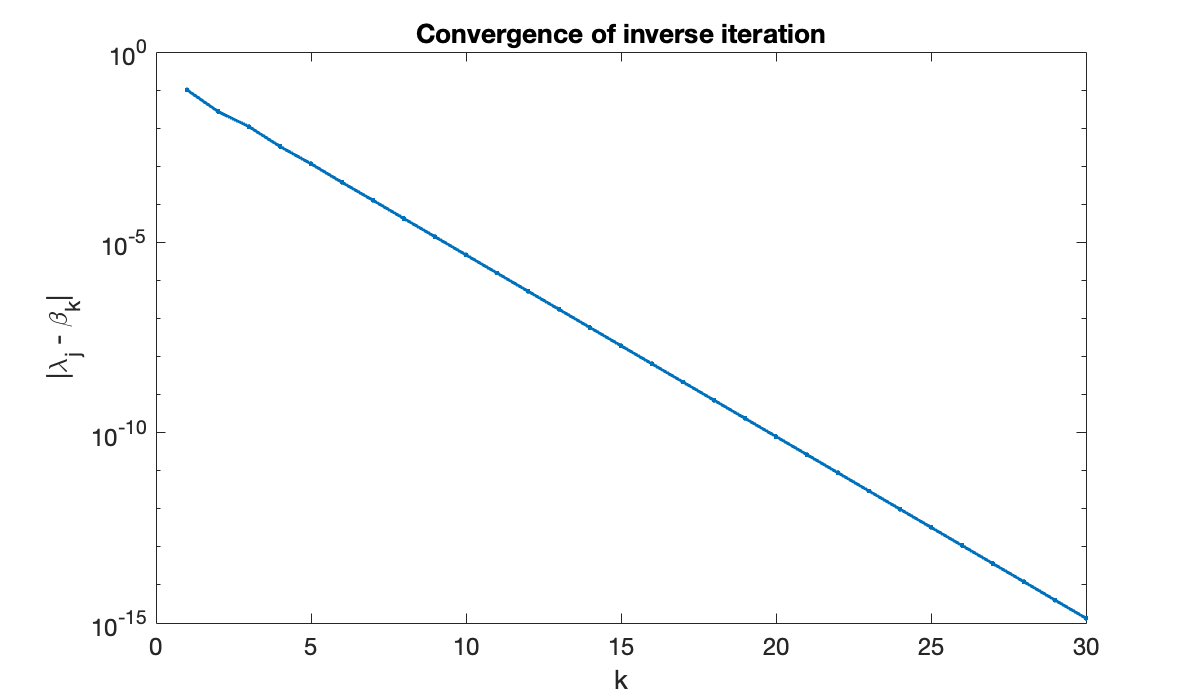

In [4]:
err = abs(0.6 - beta);
semilogy(abs(err),'.-')
title('Convergence of inverse iteration')
xlabel('k'), ylabel(('|\lambda_j - \beta_k|'));

Let's reorder the eigenvalues to enforce {eq}`shiftorder`.
```{tip}
:class: dropdown
The second output of `sort` returns the index permutation needed to sort the given vector.
```

In [5]:
[~, idx] = sort(abs(ev - s));
ev = ev(idx)

ev = 1×5 double
    0.6000    1.0000         0   -0.4000   -0.7500

Now it is easy to compare the theoretical and observed linear convergence rates.

In [6]:
theoretical_rate = (ev(1) - s) / (ev(2) - s)
observed_rate = err(26) / err(25)

theoretical_rate = -0.3333

observed_rate = 0.3332